# Modeling

In this notebook we
1. Load '../Data/data_eda.csv' which is the output of exploratory data analysis.
2. Apply different model to predict Airbnb listing price.

TODO:

Add more features & add summary

Add labels to plots

### Import Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 150)
sns.set_palette(palette)

### Load Data

In [2]:
df = pd.read_csv('../Data/data_eda.csv')
df.head()

,price,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,latitude_longitude_bin,neighbourhood_cleansed_reverted,shapes,accommodates_bedroom_ratio,accommodates_bathroom_ratio
0,85.0,81,14,0,0,4,1.0,1.0,1.0,4,2,1,61.710904,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)",4.0,4.000000
1,150.0,81,14,0,0,4,1.0,1.0,1.0,4,1,2,40.000000,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)",4.0,4.000000
2,975.0,81,14,9,0,11,4.5,5.0,7.0,4,10,2,300.000000,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)",2.2,2.444444
3,100.0,81,14,0,0,3,1.0,0.0,2.0,4,1,0,61.710904,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)",6.0,3.000000
4,450.0,81,14,9,0,6,2.0,3.0,3.0,4,6,2,125.000000,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)",2.0,3.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 18 columns):
price                              3818 non-null float64
neighbourhood_cleansed             3818 non-null int64
zipcode                            3818 non-null int64
property_type                      3818 non-null int64
room_type                          3818 non-null int64
accommodates                       3818 non-null int64
bathrooms                          3818 non-null float64
bedrooms                           3818 non-null float64
beds                               3818 non-null float64
bed_type                           3818 non-null int64
guests_included                    3818 non-null int64
cancellation_policy                3818 non-null int64
cleaning_fee                       3818 non-null float64
latitude_longitude_bin             3818 non-null int64
neighbourhood_cleansed_reverted    3818 non-null object
shapes                             3818 non-null object
a

### Prepare functions for Plotting

In [4]:
def get_sub_plots(n_total_cols, n_cols, label_font_size = 14, tick_font_size = 13):
    n_rows = int(n_total_cols / n_cols)
    if n_total_cols % n_cols != 0:
        n_rows += 1

    fig, axes = plt.subplots(nrows = n_rows,
                             ncols = n_cols,
                             squeeze = False)
    
    fig.set_size_inches(20, 5)  
    
    if n_total_cols % n_cols != 0:
        for col in range(n_total_cols % n_cols, n_cols):
            fig.delaxes(axes[n_rows - 1][col])

    axes = axes.flatten()
    
    for ax in axes:
        ax.tick_params(labelsize = tick_font_size)
        ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
        ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)

    return (fig, axes)

In [5]:
def plot_ori_vs_log_comparison(x, xlabel, n_total_cols = 2, n_cols = 2):
    fig, axes = get_sub_plots(n_total_cols, n_cols)
    
    x = pd.Series(x, name = xlabel)
    log_x = pd.Series(np.log(x), name = 'Taking log on ' + xlabel)

    sns.distplot(x, ax = axes[0])
    #axes[0].text(0.85, 0.85, 'Skew = ' + str(x.skew()))

    sns.distplot(log_x, ax = axes[1])
    #axes[1].text(0.85, 0.85, 'Skew = ' + str(log_x.skew()))
                    
    fig.tight_layout()    
    plt.show()
    
def plot_summary(y_test, y_pred, n_total_cols = 3, n_cols = 3):
    fig, axes = get_sub_plots(n_total_cols, n_cols)
    
    sns.distplot(y_pred, ax = axes[0], kde = False)
    sns.regplot(y_test, y_pred, fit_reg = False, ax = axes[1])
    #plt.xlabel("Airbnb Listing Price")
    #plt.ylabel("Predicted Airbnb Listing Price")
    #plt.title("Relationship between Price and Predicted Price")    
    sns.regplot(y_pred, y_test - y_pred, fit_reg = False, ax = axes[2])
    
    fig.tight_layout()    
    plt.show()

### Prepare functions for Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

def my_train_test_split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)
    return (X_train, X_test, y_train, y_test)

### Prepare functions for Scoring & Reporting

In [7]:
from sklearn.metrics import mean_squared_error

def report(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** (1/2)
    print ('MSE is: ', mse)
    print ('RMSE is: ', rmse)
    
def summary(y_test, y_pred):
    report(y_test, y_pred)
    plot_summary(y_test, y_pred)

### Explore Data & Engineer Features

In [8]:
df_property_type_onehot = pd.get_dummies(df['property_type'], prefix = 'property_type')
df_property_type_onehot.head()

,property_type_0,property_type_1,property_type_2,property_type_3,property_type_4,property_type_5,property_type_6,property_type_7,property_type_8,property_type_9,property_type_10,property_type_11,property_type_12,property_type_13,property_type_14,property_type_15,property_type_16
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [9]:
df_neighbourhood_cleansed_onehot = pd.get_dummies(df['neighbourhood_cleansed'], prefix = 'neighbourhood_cleansed')
df_neighbourhood_cleansed_onehot.head()

,neighbourhood_cleansed_0,neighbourhood_cleansed_1,neighbourhood_cleansed_2,neighbourhood_cleansed_3,neighbourhood_cleansed_4,neighbourhood_cleansed_5,neighbourhood_cleansed_6,neighbourhood_cleansed_7,neighbourhood_cleansed_8,neighbourhood_cleansed_9,...,neighbourhood_cleansed_77,neighbourhood_cleansed_78,neighbourhood_cleansed_79,neighbourhood_cleansed_80,neighbourhood_cleansed_81,neighbourhood_cleansed_82,neighbourhood_cleansed_83,neighbourhood_cleansed_84,neighbourhood_cleansed_85,neighbourhood_cleansed_86
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Check the price distribution & looks like taking log can make it distribute more normally.

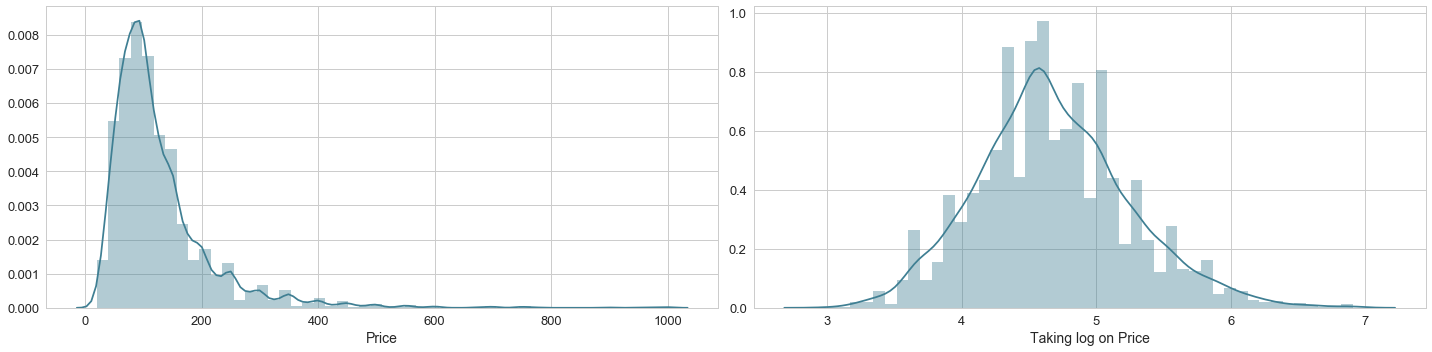

In [10]:
plot_ori_vs_log_comparison(df.price, 'Price')

### Prepare functions for modeling

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

def model(mode, X, y, take_log):
    if take_log:
        y = np.log(y)

    steps = [('scaler', StandardScaler())]
    
    if mode == 'KNN':
        steps += [('knn', KNeighborsRegressor())]
        param_grid = {'knn__n_neighbors': np.arange(1, 50)}
    elif mode == 'Linear':
        steps += [('lm', LinearRegression())]  
        param_grid = {}          
    elif mode == 'Ridge':
        steps += [('ridge', Ridge())]
        param_grid = {'ridge__alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}          
    elif mode == 'Lasso':
        steps = [('lasso', Lasso(max_iter = 10000))]
        param_grid = {'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}          
    elif mode == 'RandomForest':
        steps = [('rf', RandomForestRegressor(random_state = 42))]
        param_grid = {'rf__n_estimators': np.arange(10, 100, 10)}
    else:
        print('Mode not defined')
        return

    pipeline = Pipeline(steps)
          
    X_train, X_test, y_train, y_test = my_train_test_split(X, y)          
          
    cv = GridSearchCV(pipeline, param_grid, cv = 5)
    cv.fit(X_train, y_train)
          
    print('Best Params:', cv.best_params_)

    y_pred = cv.predict(X_test)
    
    if take_log:
        summary(np.exp(y_test), np.exp(y_pred))
    else:
        summary(y_test, y_pred)

### Define Features & Target

In [12]:
df_X = pd.concat([df[['accommodates', 'bathrooms', 'bedrooms']], df_property_type_onehot], axis = 1)
X = df_X.as_matrix()
y = df['price'].as_matrix()

### Model 1: K-Nearest Neighbors

Best Params: {'knn__n_neighbors': 11}
MSE is:  4187.71814902
RMSE is:  64.7125810722


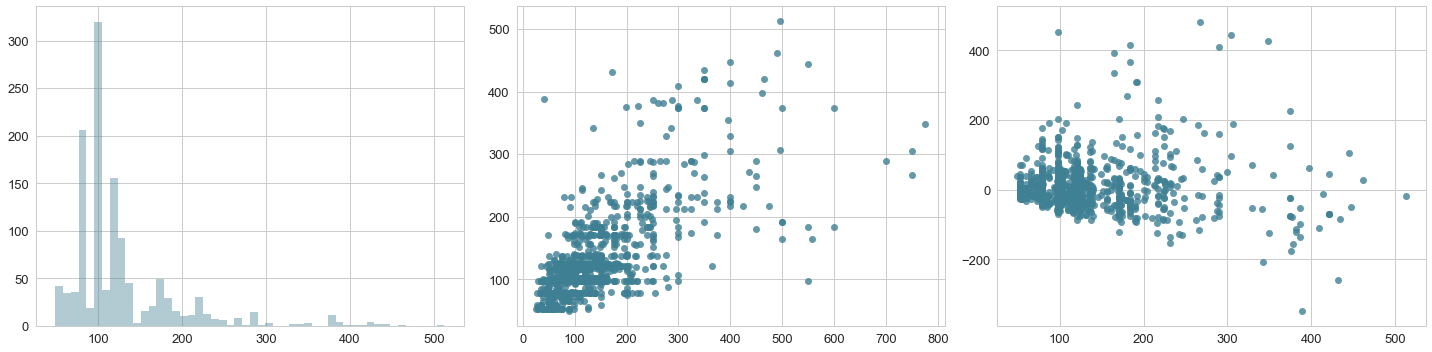

Best Params: {'knn__n_neighbors': 11}
MSE is:  4328.21131759
RMSE is:  65.789142855


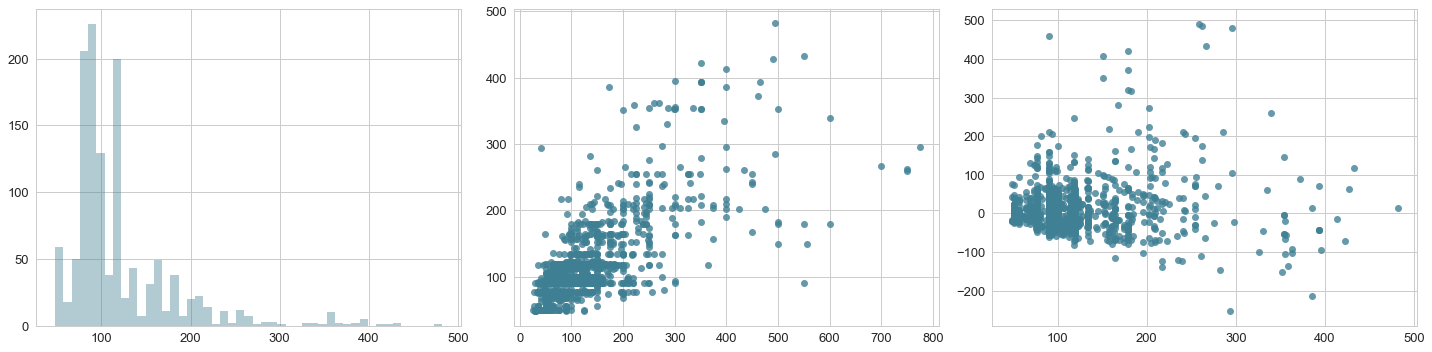

In [13]:
model('KNN', X, y, take_log = False)
model('KNN', X, y, take_log = True)

### Model 2: Linear Regression

Best Params: {}
MSE is:  4105.37813032
RMSE is:  64.0732247536


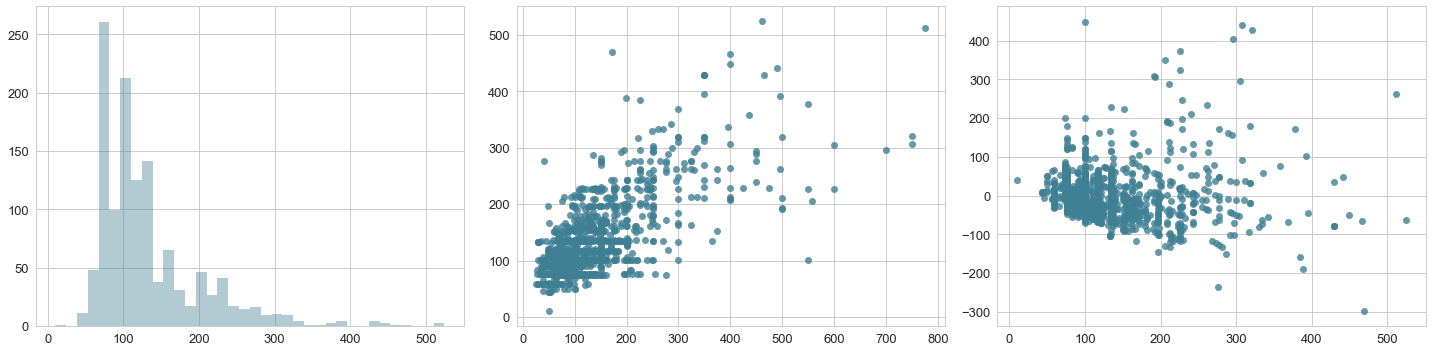

Best Params: {}
MSE is:  6017.87035212
RMSE is:  77.5749337874


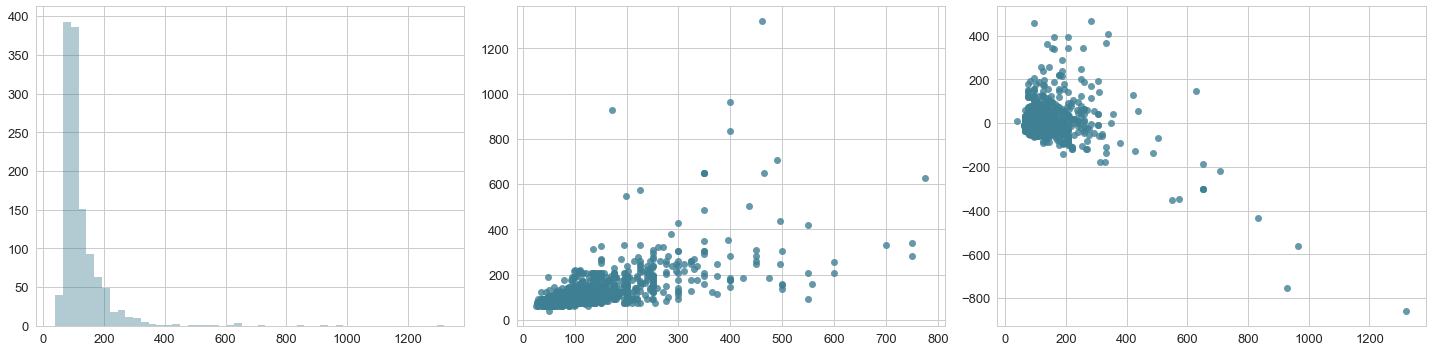

In [14]:
model('Linear', X, y, take_log = False)
model('Linear', X, y, take_log = True)

### Model 2: Ridge Regularization Model

Best Params: {'ridge__alpha': 100}
MSE is:  4097.65403234
RMSE is:  64.0129208233


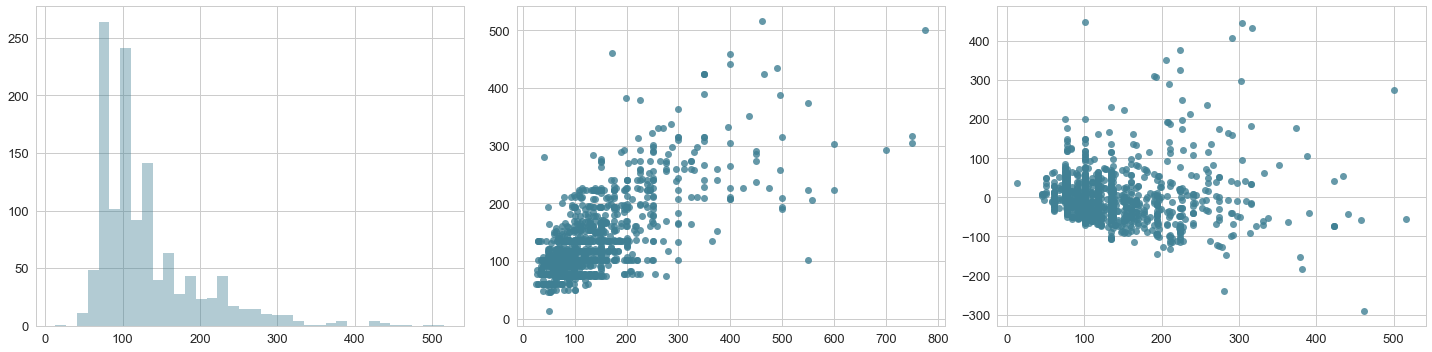

Best Params: {'ridge__alpha': 50}
MSE is:  5831.6618992
RMSE is:  76.3653186937


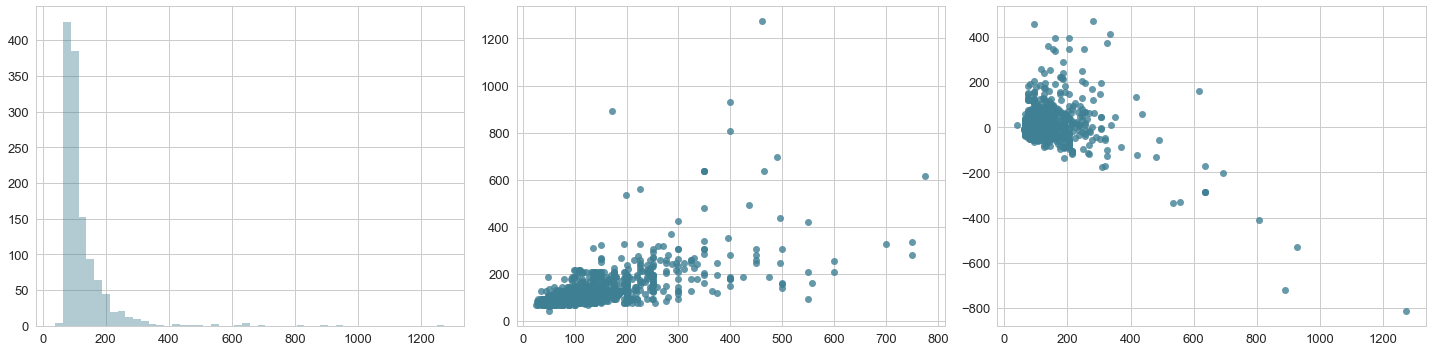

In [15]:
model('Ridge', X, y, take_log = False)
model('Ridge', X, y, take_log = True)

### Model 3: Lasso Regularization Model

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Best Params: {'lasso__alpha': 0.1}
MSE is:  4165.01548502
RMSE is:  64.5369311714


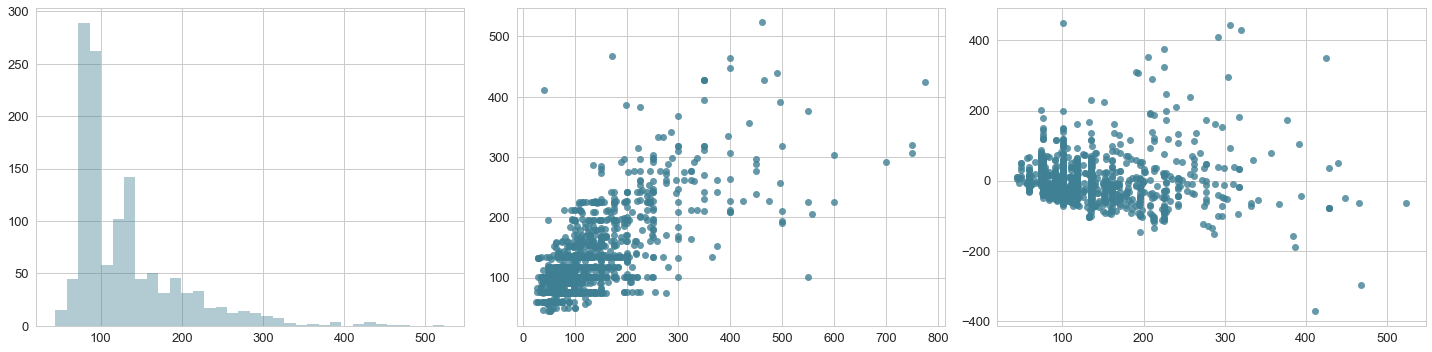

Best Params: {'lasso__alpha': 0.001}
MSE is:  6157.04886265
RMSE is:  78.4668647434


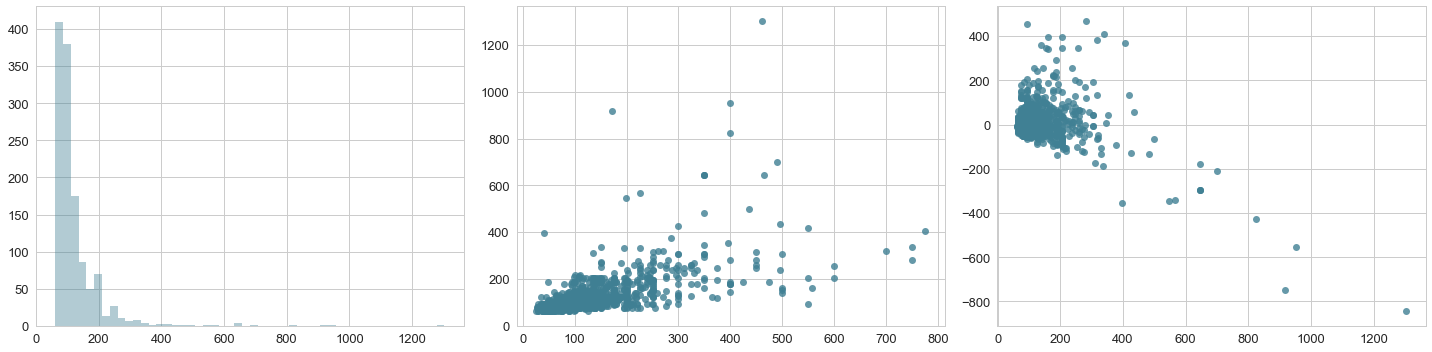

In [16]:
model('Lasso', X, y, take_log = False)
model('Lasso', X, y, take_log = True)

### Model 4: Random Forest

Best Params: {'rf__n_estimators': 20}
MSE is:  4117.82198602
RMSE is:  64.1702577993


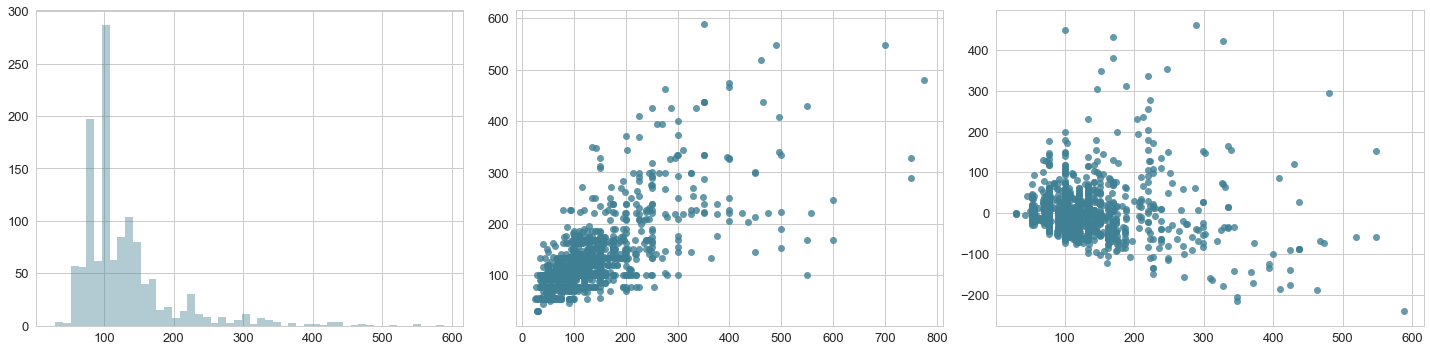

Best Params: {'rf__n_estimators': 70}
MSE is:  4192.08044112
RMSE is:  64.7462774306


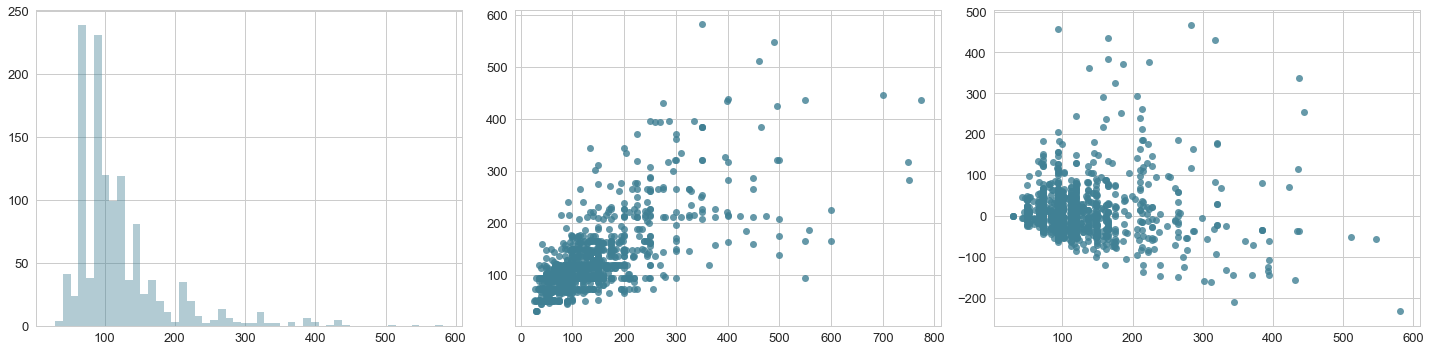

In [17]:
model('RandomForest', X, y, take_log = False)
model('RandomForest', X, y, take_log = True)